In [2]:
import numpy as np
import torch
import pprint
import matplotlib.pyplot as plt
import sys
import pickle
import argparse
import logging
import os
import heapq
import random
import pickle
import sys
import pandas as pd
import json
import gzip




In [3]:
exp_path = '/Users/laurengreenspan/GitDLs/TreeNiNNew/code_ginkgo/recnn/experiments/ginkgo/'

In [28]:
#jet_algorithms=['kt','antikt','truth','ptdesc']
jet_algorithms=['kt','antikt']
learning_rate=2e-3
decay=0.9
batch_size=32
num_epoch=30
#hidden_dims=[20,40,80,160,320,640]

hidden_dims=[20,40,80,160]
jet_number=1020000
Nfeatures=4
results_dictionary = []
metrics_history = []

for i in range(len(jet_algorithms)):
    for j in range(len(hidden_dims)):
        
        jet_algorithm = jet_algorithms[i]
        hidden_dim = hidden_dims[j]
        job_name = 'ginkgo_'+str(jet_algorithm)+'_lr_'+str(learning_rate)+'_decay_'+str(decay)+'_batch_'+str(batch_size)+'_epochs_'+str(num_epoch)+'_hidden_'+str(hidden_dim)+'_Njets_'+str(jet_number)+'_features_'+str(Nfeatures)
        try_path =exp_path+job_name+'/run_0'
        
        with open(try_path+'/roc_'+str(num_epoch)+'_ginkgo_'+str(jet_algorithm)+'_'+str(jet_number)+'jets.pkl','rb') as f:
            roc_aux = list(pickle.load(f))
        with open(try_path+'/yProbTrue_'+str(num_epoch)+'_ginkgo_'+str(jet_algorithm)+'_'+str(jet_number)+'jets.pkl','rb') as f:
            yProb_aux = list(pickle.load(f))
        with open(try_path+'/metrics_history.json') as f:
            metrics_history_aux = json.load(f)
        with open(try_path+'/metrics_test_best.json') as f:
            metrics_test_best_aux = json.load(f)
        with open(try_path+'/metrics_val_best_weights.json') as f:
            metrics_val_best_aux = json.load(f)
        dictionary = {'hidden':int(hidden_dim),
                      'algorithm':jet_algorithm,
                      'accuracy':metrics_test_best_aux['accuracy'], 
                      'loss':metrics_test_best_aux['loss'],
                      'auc':metrics_test_best_aux['auc'],
                      'train_loss':metrics_history_aux['train_loss'],
                      'val_loss':metrics_history_aux['val_loss'],
                      'train_accuracy':metrics_history_aux['train_accuracy'],
                      'val_accuracy':metrics_history_aux['val_accuracy'],
                      'val_bg_reject':metrics_history_aux['val_bg_reject'],
                      'roc':np.asarray(roc_aux),
                      'fpr':np.asarray([x for (x,y) in roc_aux]),
                      'tpr':np.asarray([y for (x,y) in roc_aux]),
                      'yProbTrue':np.asarray(yProb_aux)}
        results_dictionary.append(dictionary)


In [30]:
results_dictionary[0].keys()

dict_keys(['hidden', 'algorithm', 'accuracy', 'loss', 'auc', 'train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject', 'roc', 'fpr', 'tpr', 'yProbTrue'])

In [31]:
[{'train_accuracy':min(metrics_history[k][1]['train_accuracy']),'val_accuracy':min(metrics_history[k][1]['val_accuracy'])} for k in range(len(metrics_history))]



[]

In [50]:
key = 1
small_keys = ['hidden', 'algorithm', 'accuracy', 'loss', 'auc']

small_dictionary = [{**{small_keys[key]:results_dictionary[i][small_keys[key]] for key in range(len(small_keys))},**{'train_accuracy':min(results_dictionary[i]['train_accuracy']),'val_accuracy':min(results_dictionary[i]['val_accuracy'])}}for i in range(len(results_dictionary))]



In [51]:

pd.DataFrame(data=small_dictionary)

,hidden,algorithm,accuracy,loss,auc,train_accuracy,val_accuracy
0,20,kt,0.507137,0.692749,0.507544,0.502405,0.500000
1,40,kt,0.508814,0.692489,0.508863,0.501618,0.503995
2,80,kt,0.500000,0.693173,0.500000,0.499114,0.500000
3,160,kt,0.500000,0.693147,0.500000,0.499239,0.500000
4,20,antikt,0.508172,0.692591,0.507933,0.503889,0.504961
5,40,antikt,0.507676,0.692582,0.508082,0.501520,0.504838
6,80,antikt,0.500005,0.693158,0.500005,0.498892,0.500000
7,160,antikt,0.499995,0.693147,0.499995,0.498703,0.500000


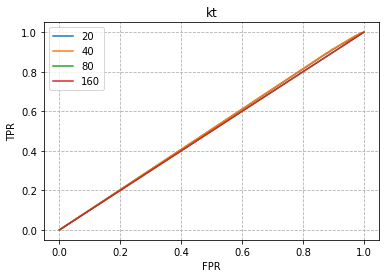

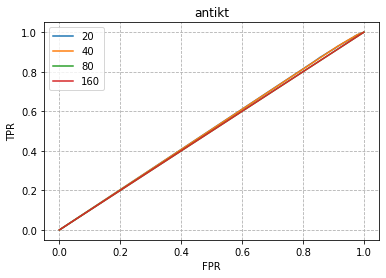

In [52]:

for j in range(len(jet_algorithms)):
    for k in range(j*len(hidden_dims),(j+1)*len(hidden_dims)):
        plt.plot(results_dictionary[k]['fpr'],results_dictionary[k]['tpr'],label = results_dictionary[k]['hidden'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(results_dictionary[k]['algorithm'])
    plt.legend()
    plt.grid(which='both',axis='both',linestyle='--')
    plt.show()

In [56]:
results_dictionary[1].keys()

dict_keys(['hidden', 'algorithm', 'accuracy', 'loss', 'auc', 'train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject', 'roc', 'fpr', 'tpr', 'yProbTrue'])

In [57]:
def plotvepoch(key,xlabel,ylabel):
    for j in range(len(jet_algorithms)):
        for k in range(j*len(hidden_dims),(j+1)*len(hidden_dims)):
            plt.plot(results_dictionary[k][key], label=results_dictionary[k]['hidden'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(results_dictionary[k]['algorithm'])
        plt.legend()
        plt.grid(which='both',axis='both',linestyle='--')
        plt.show()

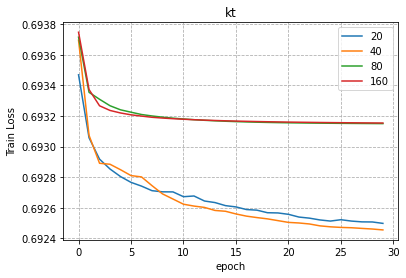

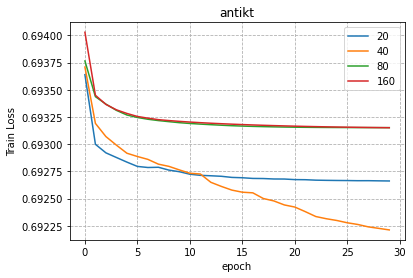

In [58]:
plotvepoch('train_loss','epoch','Train Loss')

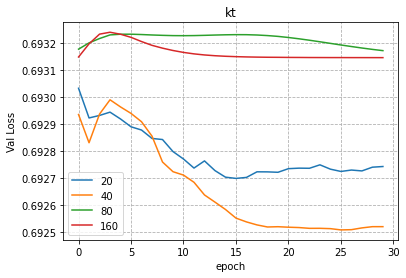

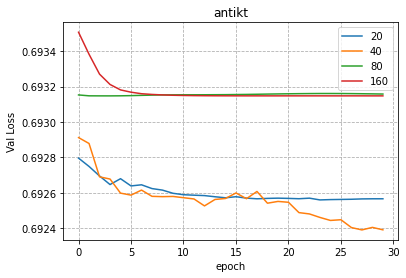

In [59]:
plotvepoch('val_loss','epoch','Val Loss')

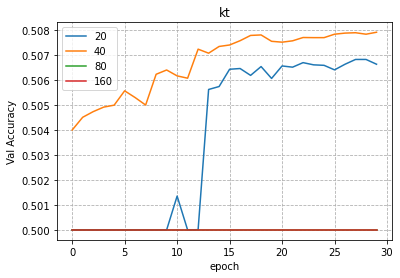

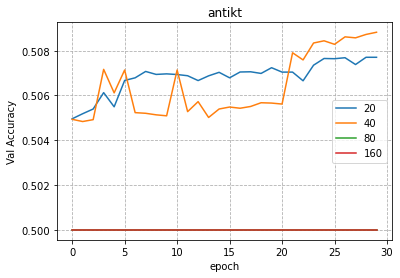

In [60]:
plotvepoch('val_accuracy','epoch','Val Accuracy')

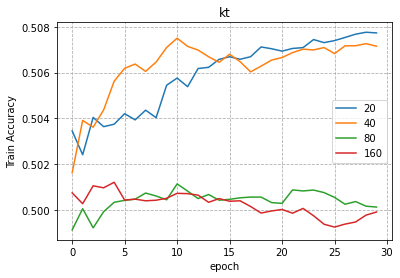

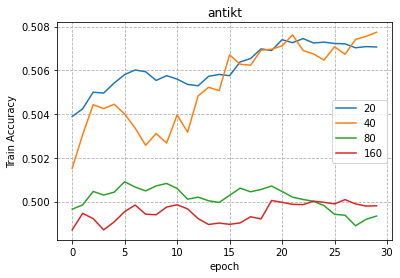

In [61]:
plotvepoch('train_accuracy','epoch','Train Accuracy')

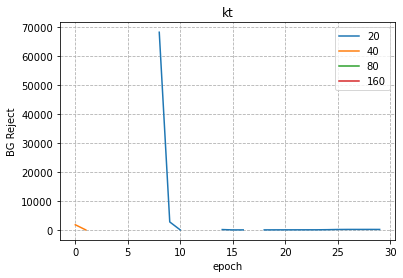

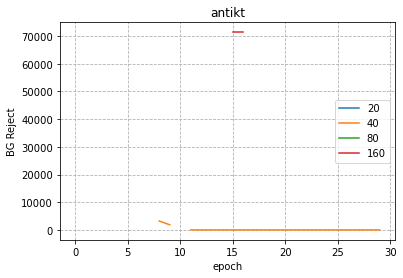

In [62]:
plotvepoch('val_bg_reject','epoch','BG Reject')